### 分析 民主進步黨 與 台灣民眾黨  

> ### 4. 關聯圖

In [1]:
import pandas as pd 
df = pd.read_csv("data/10802_2020_party.csv") #匯資料
df["Post_Date"] = df["Date"].str.split(" ").str.get(0).str.title() #加Post_Date欄位
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

In [2]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  

def seg_sentence(sentence):  
    jieba.load_userdict("dict/user.txt")
    sentence_seged = jieba.cut(sentence)  
    stopwords = stopwordslist('dict/stop_words.txt') 
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t':  
                outstr += word  
                outstr += ' ' 
    return outstr  

def not_load_dict(sentence):
    sentence_seged = jieba.cut(sentence)  
    outstr = ''  
    for word in sentence_seged:  
        outstr += word  
        outstr += ' ' 
    return outstr  

def get_list(df):
    index_ = list(df.index)
    word_list =''
    for i in index_:
        word_list += df['Message'][i]
    
    return word_list

### 資料前處理
選出民進黨的發文，處理方式和上面一樣

In [3]:
import jieba
from tqdm import tqdm
df_green = df[df['Page_Name']=='民主進步黨']
df_green_New = df_green[['Post_Date', 'Message']]
df_green_New = df_green_New.dropna()
df_green_New['Message']

doc_names = range(len(df_green_New))
text_list = list(df_green_New['Message'])
df_green_docs = pd.DataFrame(columns=['jieba_results'])
df_green_docs['jieba_results'] = df_green_docs['jieba_results'].astype('str')

stopwords = stopwordslist('dict/stop_words.txt') 
jieba.load_userdict("dict/user.txt")
for i in doc_names:
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        if word not in stopwords :  
            text = text + ' ' + str(word)
        elif word != '\n':
            text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    df_green_docs = df_green_docs.append(s, ignore_index=True)  
    
df_green_New.reset_index(inplace=True)  #不設定的話會有錯亂的情形，data對不起來
df_green_New['jieba_results'] = df_green_docs
df_green_New['df_class'] = 'green'


#改變日期
df_green_New['Post_Date'] = df_green_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test1 = df_green_New.groupby(df_green_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})
#取出日期
date = sorted(df_green_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test1):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d = {"Post_Date": date,"jieba_results": store,"df_class":'green'}
df_green_New = pd.DataFrame(d)
df_green_New

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\COCO\AppData\Local\Temp\jieba.cache
Loading model cost 2.219 seconds.
Prefix dict has been built succesfully.


,Post_Date,jieba_results,df_class
0,201901,新任 民主 進步 黨 秘書長 為羅文嘉 。 【 捍衛 台灣國 家主 權 、 堅守 民主 ...,green
1,201902,【 余天 競總 成立 卓榮泰 ： 讓 余天 和 蘇貞昌 一起 努力 ， 讓 主委 在 ...,green
2,201903,【 羅 文嘉 ： 這一戰 不是 民進 黨 的 勝利 是 守護 台灣 民主 的 勝利 】...,green
3,201904,【 經濟 衰退 ， 英九 最會 】 \n \n 高雄市 長 韓國瑜 抨擊 三任 總統 搞 ...,green
4,201905,【 台灣 在 進步 拒絕 顛倒 是非 】 \n \n 國民黨 以顛 倒 是非 、 ...,green
5,201906,【 2020 年 總統 選舉 提名 初選民調 結果 新聞稿 】 \n \n 民...,green
6,201907,「 今天 ， 其實 也 是 解嚴 三十二 週年 的 日子 ， 作為 一個 解嚴 後 出生 ...,green
7,201908,"台灣 ， 現在 最 好玩 ！ Now , It ' s Time to V...",green
8,201909,【 敬悼 史明 前輩 】 \n \n 昨晚 ， 永遠 的 革命者 - 史明 前輩 ...,green
9,201910,【 「 台灣 派隊 」 青年 連線 重磅 登板 ！ 】 \n \n 2020 大選...,green


選出台灣民眾黨的發文，處理方式和上面一樣

In [4]:
df_white = df[df['Page_Name']=='台灣民眾黨']

df_white_New = df_white[['Post_Date', 'Message']]
df_white_New = df_white_New.dropna()
df_white_New['Message']

doc_names = range(len(df_white_New))
text_list = list(df_white_New['Message'])
df_white_docs = pd.DataFrame(columns=['jieba_results'])
df_white_docs['jieba_results'] = df_white_docs['jieba_results'].astype('str')

jieba.load_userdict("dict/user.txt")
# count = 0
for i in doc_names:
#     count = count + 1
#     if(count==5000):
#         break
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        if word not in stopwords:  
            text = text + ' ' + str(word)
    s = pd.Series({'jieba_results': text})
    if(text=='NAN'):
        print(text_list[i])
    elif(text==''):
        print(text_list[i])
    df_white_docs = df_white_docs.append(s, ignore_index=True)  
    
df_white_New.reset_index(inplace=True)        
df_white_New['jieba_results'] = df_white_docs
df_white_New['df_class'] = 'white'

#改變日期
df_white_New['Post_Date'] = df_white_New['Post_Date'].apply(lambda x : str(x).split("/")[0].split("-")[0]+str(x).split("/")[0].split("-")[1])
test1 = df_white_New.groupby(df_white_New['Post_Date']).apply(lambda x:[' '.join(x['jieba_results'])]).rename(columns={'Post_Date':'jieba_results'})
#取出日期
date = sorted(df_white_New['Post_Date'].unique())
#取出各月份的文章，存到一個陣列中
store = []
for index, article in enumerate(test1):
    store.append(article[0])
#把資料格式轉成dict再塞進去panda的dataframe
d = {"Post_Date": date,"jieba_results": store,"df_class":'white'}
df_white_New = pd.DataFrame(d)
df_white_New

,Post_Date,jieba_results,df_class
0,201908,台灣民眾 黨 — — 創黨 大會 宣言 \n \n \n 台灣 自解嚴 三...,white
1,201909,民眾 黨 第一波 立委 提名 \n \n \n 藍綠光 譜 之外 創造 第...,white
2,201910,完全 執政 傲慢 \n \n \n 民進 黨 一個 歷史 政黨 威權 爭取...,white
3,201911,台灣民眾 黨 分區 立委 名單 \n \n \n 相信 眾人 智慧 會...,white
4,201912,民眾 黨 女力 新 時代 \n \n 三黨 半 \n 台灣重 開機 \n 政黨票 請 ...,white
5,202001,推動 這場 寧靜 革命 \n \n \n 台灣民眾 黨 本次 大選中 共 ...,white


合併上面兩個dataframe

In [5]:
mergeData = df_white_New.append(df_green_New)
mergeData = mergeData.dropna() #刪除有NAN值的data
#mergeData

## TF-IDF

In [6]:
corpus = mergeData['jieba_results'].values.tolist()

In [7]:
# TF-IDF
# coding:utf-8  
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [8]:
len(corpus)
features = tfidf.toarray()
labels = mergeData['Post_Date'].values
#labels

### PCA

In [9]:
from pandas import DataFrame, read_csv
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
mergeData['pca1'] = DataFrame(transData[:,0])
mergeData['pca2'] = DataFrame(transData[:,1])
#mergeData.head(150)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

textFrame = pd.DataFrame(features, columns = word)
textFrame

,00,000,0010830932,01,0101,0102,0106,0107,0108,0109,...,龍濱路,龍興街,龍門路,龐克,龐克音樂,龐大,龔明鑫,龜山,龜山區,龜山文
0,0.006864,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.006105,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.064917,0.000000,0.003946,0.003002,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.007108,0.004498,0.012007,0.003946,0.004498
3,0.096832,0.000000,0.009917,0.002515,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002977,0.000000,0.000000,0.003306,0.000000
4,0.078559,0.000000,0.000000,0.003723,0.00279,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005585,0.000000,0.000000
5,0.075663,0.000000,0.000000,0.051231,0.00000,0.010236,0.005118,0.005118,0.005118,0.005118,...,0.005118,0.005118,0.005118,0.000000,0.000000,0.000000,0.000000,0.017077,0.000000,0.000000
6,0.005898,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.006620,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.014951,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.118100,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
allF = features.flatten()
nonZero = allF[np.nonzero(allF)]
m = np.median(nonZero)

In [12]:
allF[np.nonzero(allF)]

array([0.00686371, 0.01949902, 0.01372741, ..., 0.00465267, 0.00209736,
       0.0113261 ])

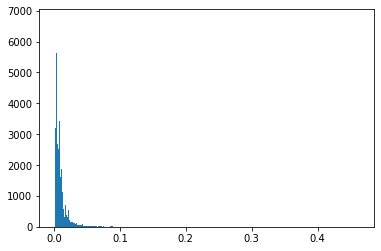

0.006803543276738533

In [13]:
plt.hist(nonZero, bins=500)
plt.show()
m

In [14]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[tuple([textFrame.iloc[i] >= m])]  #有tuple error
    dataset.append(temp.tolist())

In [15]:
for i in range(len(features)):
    print(dataset[i])

['中心思想', '人民', '作品', '利益', '台灣', '台灣民眾', '圍者', '徵集', '改變', '政治', '文化', '柯文', '標準', '社會', '藍綠']
['作品', '台灣', '台灣民眾', '捐贈', '政治', '民眾', '獻金', '萬元']
['10', '主席', '台灣', '台灣民眾', '改變', '政治', '文化', '柯文', '民眾', '海選', '立委']
['youtube', '主席', '之聲', '台灣民眾', '台灣重', '地址', '捐款', '政治', '晚間', '楊寶楨', '每週', '民眾', '直播', '眾議院', '立委', '開機']
['15', '之聲', '做主', '反顧', '台大', '台灣民眾', '掃街', '民眾', '直播', '眾議院', '眾走', '開機']
['15', 'day', '做主', '反顧', '台大', '台灣民眾', '向前走', '掃街', '柯文', '民眾', '直播', '眾貫線', '眾走', '行程']
['2pcwujn', 'bit', 'fb', 'http', 'ly', '主席', '何志偉', '全文', '動態', '卓榮泰', '我們', '新聞稿', '民主', '王義川', '立委', '補選', '阿川']
['ff3ry', 'https', 'is', 'pse', '二二八', '余天', '卓榮泰', '台南', '台灣', '我們', '振彥', '支持', '新聞稿', '民主', '活動', '追思', '郭國文']
['bit', 'ly', 'mv', '一府', '一起', '三重', '二鹿', '余天', '作伙', '台南', '台灣', '台灣行', '彰化', '振彥', '支持', '民主', '號黃振彥', '補選', '郭國文', '願景能']
['00', 'grm4b', 'https', '人行道', '凱達格蘭', '凹子底', '出發', '初選', '協調', '台灣', '告別', '地點', '大道', '廢核', '我們', '明媚', '時間', '核電', '福門', '綠能', '賓館', '近景', '選區', '隊伍', '

### apriori 關聯圖

In [16]:
# Apriori: https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = mergeData['Post_Date']

In [17]:
graph.tail()

Post_Date,201908,201909,201910,201911,201912,202001,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001
電話,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
願景能,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
風光,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
香港,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
黨慶,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [18]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.001
apriori(graph, min_support = minsup, use_colnames=True)

,support,itemsets
0,0.083799,(201908)
1,0.044693,(201909)
2,0.061453,(201910)
3,0.089385,(201911)
4,0.067039,(201912)
...,...,...
35200,0.005587,"(201907, 201909, 202001, 201903, 201911, 20190..."
35201,0.005587,"(201902, 201907, 201909, 202001, 201903, 20191..."
35202,0.005587,"(201902, 201907, 201909, 202001, 201903, 20191..."
35203,0.005587,"(201902, 201907, 201909, 202001, 201903, 20190..."


In [19]:
result = apriori(graph, min_support = minsup)
result

,support,itemsets
0,0.083799,(0)
1,0.044693,(1)
2,0.061453,(2)
3,0.089385,(3)
4,0.067039,(4)
...,...,...
35200,0.005587,"(0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
35201,0.005587,"(0, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
35202,0.005587,"(0, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
35203,0.005587,"(1, 2, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."


In [ ]:
rules = association_rules(result, metric="confidence", min_threshold=0.05)
rules.head()

In [ ]:
rules = association_rules(result, metric="lift", min_threshold=1.2)
rules.head()

In [ ]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

In [ ]:
out = rules[ (rules['antecedant_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]
out.head()

In [ ]:
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [ ]:
len(rules)
rules['antecedents'].head()

In [ ]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(mergeData)):
    G.add_node(i)
for i in range(len(rules['antecedents'])):
    currentFrom = list(rules['antecedents'][i])
    currentTo = list(rules['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

In [ ]:
nodeListA = mergeData.index[mergeData['df_class'] == 'white'].tolist()
nodeListB = mergeData.index[mergeData['df_class'] == 'green'].tolist()
plt.figure(figsize=(20,20))

# positions for all nodes
pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA,node_color="blue", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB,node_color="red",node_size=1000)
nx.draw_networkx_edges(G, pos, width=3,edge_color='gray')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
nx.draw(G, with_labels=True)

plt.axis('off')
plt.savefig("img/weighted_graph.png") # save as png

plt.show() # display